In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import random
import os

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(36)
random.seed(36)
tf.random.set_seed(36)

In [22]:
df = pd.read_csv("D:Datasets/PracticeDatasets/insurance.csv")

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
sex = pd.get_dummies(df['sex'])

In [25]:
sex = sex.drop("female",axis=1)

In [26]:
smoker = pd.get_dummies(df['smoker'])

In [27]:
smoker = smoker.drop("no", axis=1)

In [28]:
smoker = smoker.rename(columns={'yes': 'smoker'})

In [29]:
region = pd.get_dummies(df['region'])

In [30]:
df = pd.concat([df, sex, smoker, region],axis=1)

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [32]:
df = df.drop(['sex', 'region', 'smoker'], axis=1)

In [34]:
null_counts = df.isnull().sum()
print(null_counts)

age          0
bmi          0
children     0
charges      0
male         0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64


In [37]:
from scipy.stats import shapiro
def check_normality(dataframe, column_name):
    """Check if column data in a dataframe is normally distributed"""
    stat, p = shapiro(dataframe[column_name])

    print('Statistics=%.3f, p=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print(f'Data in {column_name} looks Gaussian (Normally Distributed)')
    else:
        print(f'Data in {column_name} does not look Gaussian (Not Normally Distributed)')


In [38]:
for col in df:
    		check_normality(df,col)


Statistics=0.945, p=0.000
Data in age does not look Gaussian (Not Normally Distributed)
Statistics=0.994, p=0.000
Data in bmi does not look Gaussian (Not Normally Distributed)
Statistics=0.823, p=0.000
Data in children does not look Gaussian (Not Normally Distributed)
Statistics=0.815, p=0.000
Data in charges does not look Gaussian (Not Normally Distributed)
Statistics=0.637, p=0.000
Data in male does not look Gaussian (Not Normally Distributed)
Statistics=0.532, p=0.000
Data in northeast does not look Gaussian (Not Normally Distributed)
Statistics=0.532, p=0.000
Data in northwest does not look Gaussian (Not Normally Distributed)
Statistics=0.556, p=0.000
Data in southeast does not look Gaussian (Not Normally Distributed)
Statistics=0.532, p=0.000
Data in southwest does not look Gaussian (Not Normally Distributed)


<Figure size 1000x400 with 0 Axes>

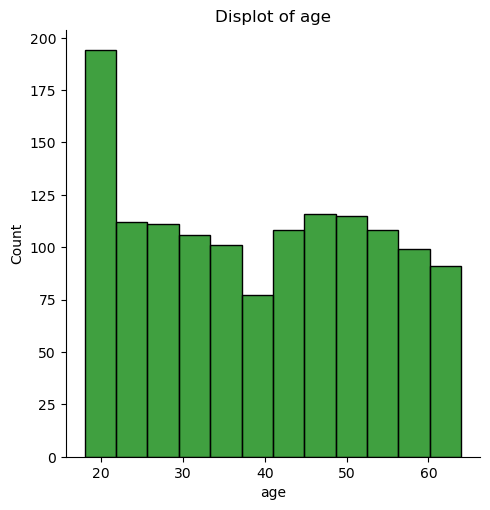

<Figure size 1000x400 with 0 Axes>

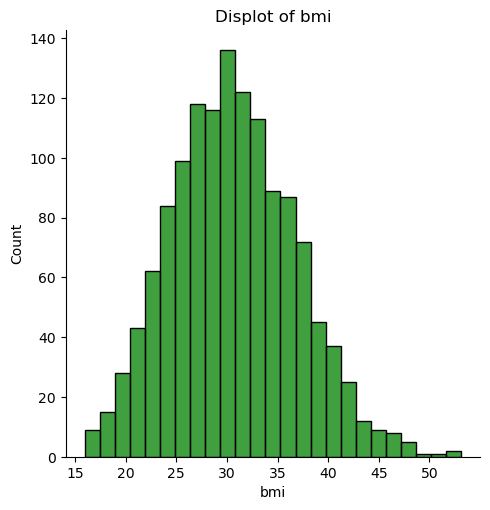

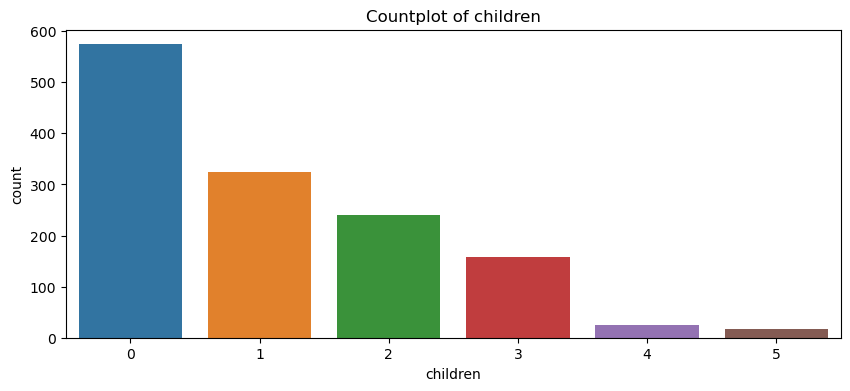

<Figure size 1000x400 with 0 Axes>

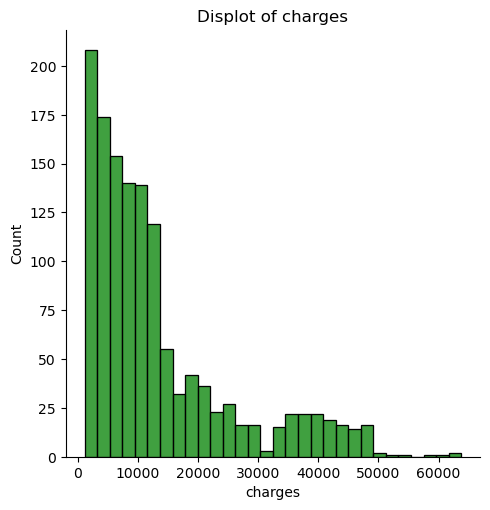

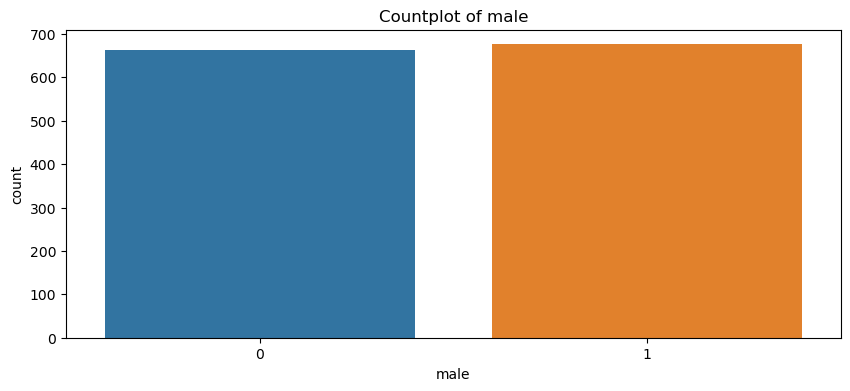

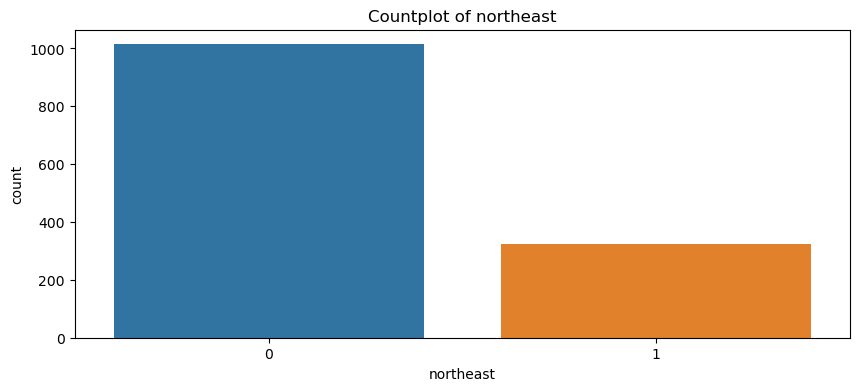

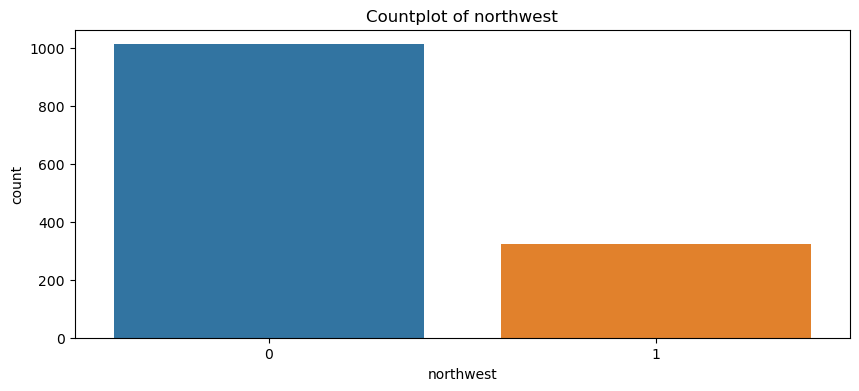

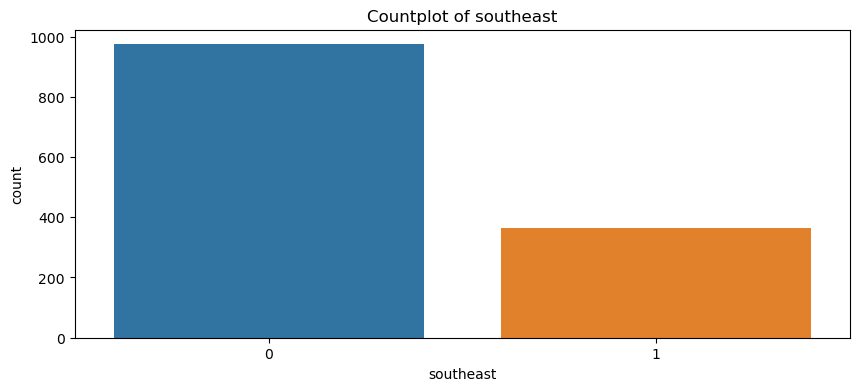

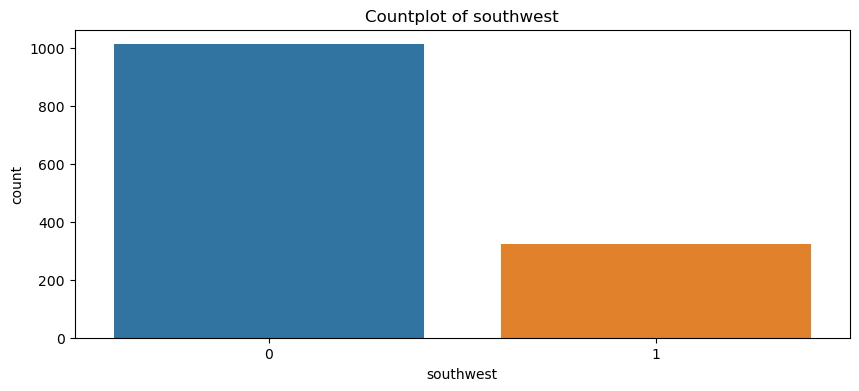

In [39]:
for column in df.columns:
    if df[column].nunique() <10:
        plt.figure(figsize=(10, 4))  # Change figure size to your liking
        sns.countplot(data=df, x=df[column])
        plt.title(f"Countplot of {column}")
        plt.show()
    else:
        plt.figure(figsize=(10, 4))  # Change figure size to your liking
        sns.displot(data=df, x=df[column],color='g')
        plt.title(f"Displot of {column}")
        plt.show()


<Axes: >

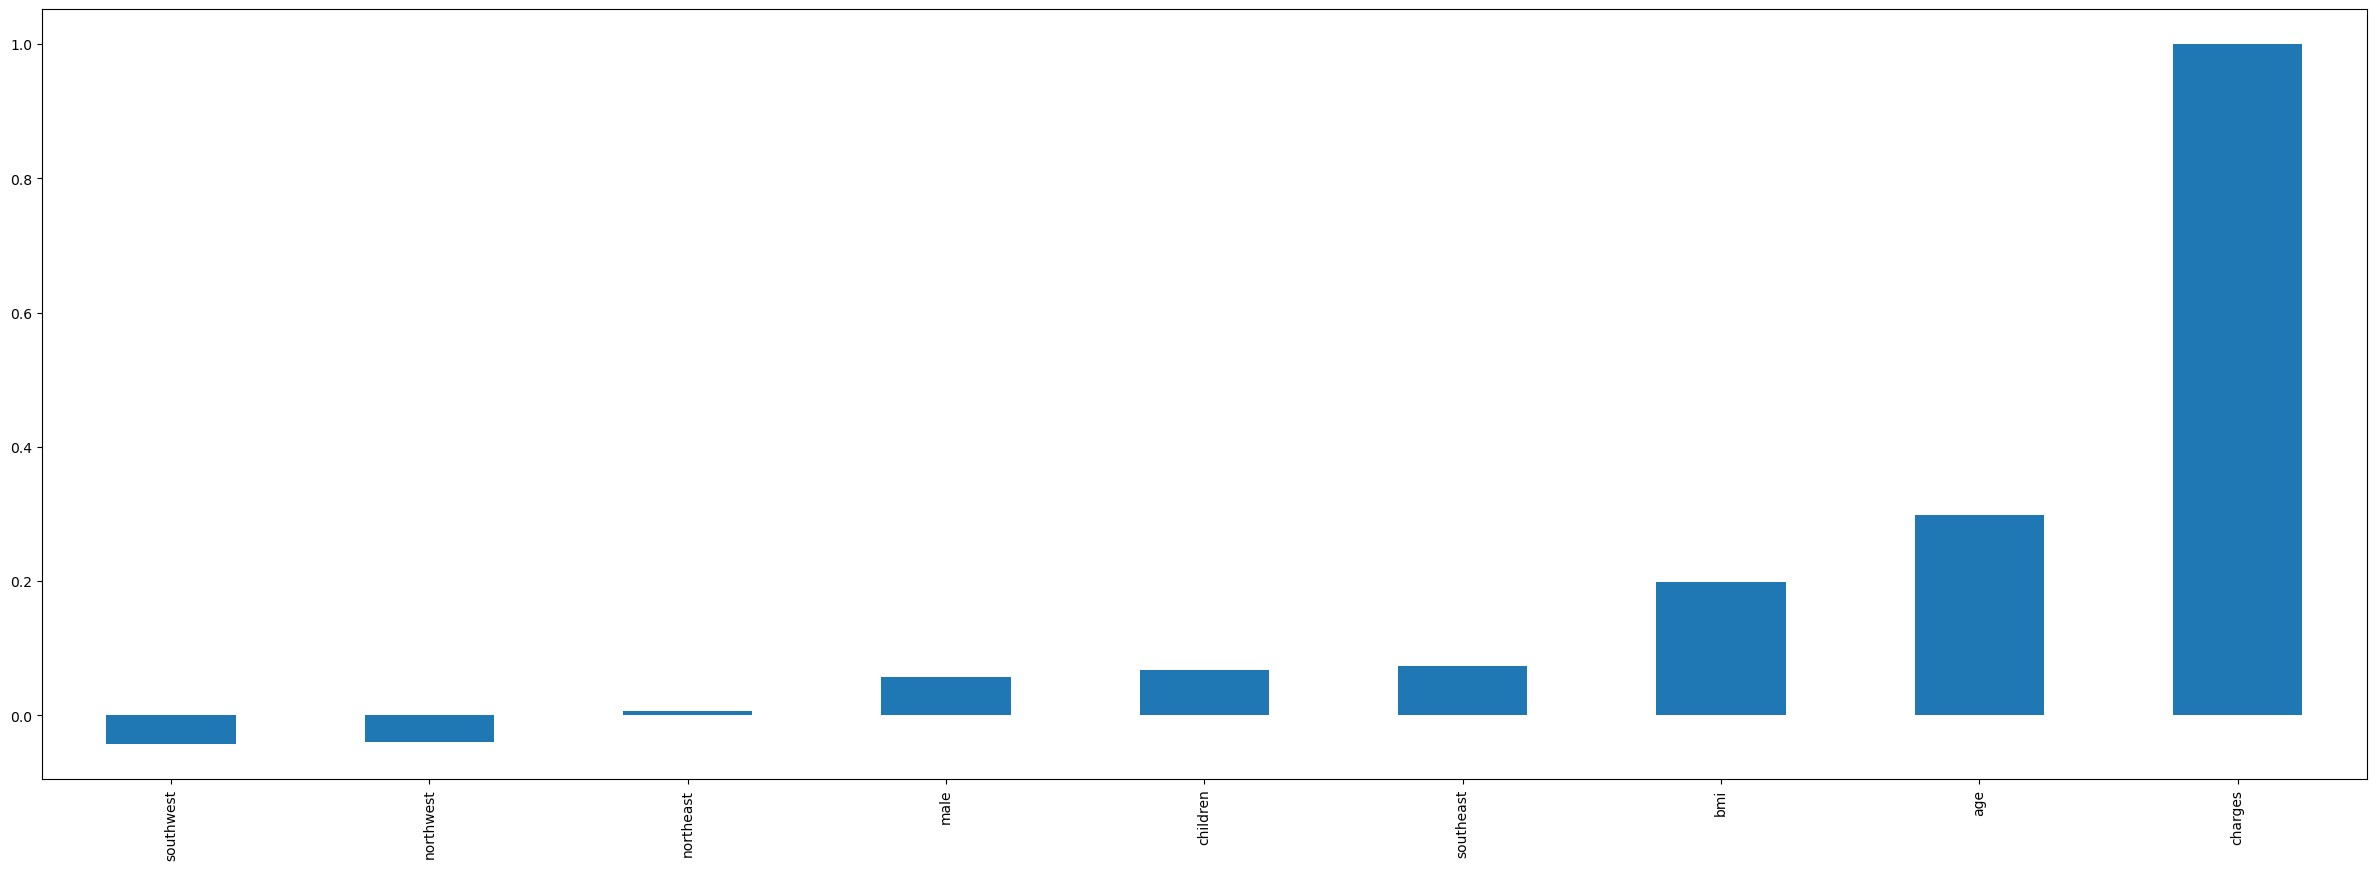

In [41]:
plt.figure(figsize=(30,10))
df.corr()['charges'].sort_values().plot(kind='bar')


In [42]:
X = df.drop("charges",axis=1).values
y = df['charges'].values

In [47]:
df.shape

(1338, 9)

In [52]:
X_train.shape

(1003, 8)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=36)

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [51]:
model = Sequential()

In [54]:
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [55]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [60]:
results = model.fit(X_train, y_train, epochs=10000, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10000
32/32 - 0s - loss: 137560256.0000 - val_loss: 103101136.0000 - 49ms/epoch - 2ms/step
Epoch 2/10000
32/32 - 0s - loss: 137560224.0000 - val_loss: 103144800.0000 - 34ms/epoch - 1ms/step
Epoch 3/10000
32/32 - 0s - loss: 137555296.0000 - val_loss: 103126456.0000 - 31ms/epoch - 964us/step
Epoch 4/10000
32/32 - 0s - loss: 137548288.0000 - val_loss: 103160000.0000 - 31ms/epoch - 973us/step
Epoch 5/10000
32/32 - 0s - loss: 137559696.0000 - val_loss: 103239048.0000 - 34ms/epoch - 1ms/step
Epoch 6/10000
32/32 - 0s - loss: 137550624.0000 - val_loss: 103200152.0000 - 33ms/epoch - 1ms/step
Epoch 7/10000
32/32 - 0s - loss: 137555152.0000 - val_loss: 103267352.0000 - 32ms/epoch - 1ms/step
Epoch 8/10000
32/32 - 0s - loss: 137559760.0000 - val_loss: 103150440.0000 - 32ms/epoch - 1ms/step
Epoch 9/10000
32/32 - 0s - loss: 137545360.0000 - val_loss: 103145016.0000 - 31ms/epoch - 969us/step
Epoch 10/10000
32/32 - 0s - loss: 137547296.0000 - val_loss: 103215560.0000 - 30ms/epoch - 939us/step
E

<Axes: >

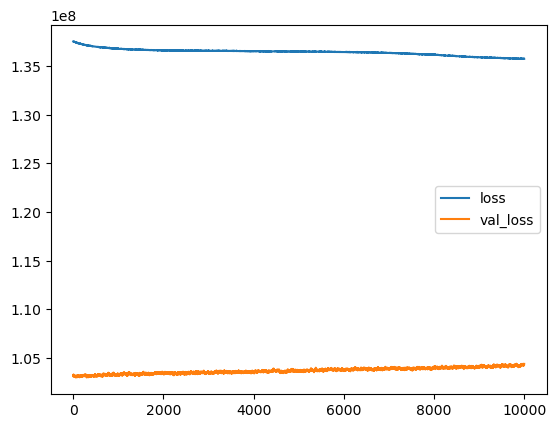

In [61]:
losses = pd.DataFrame(model.history.history)
losses.plot()


In [76]:
predictions = model.predict(X_test)

11/11 [==============================] - 0s 460us/step


In [80]:
predictions.shape

(335, 1)

In [85]:
y_test = y_test.reshape(335,1)

In [81]:
predictions = predictions.reshape(y_test

(335,)

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [114]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


In [90]:
print(f'mse: {mse}')

mse: 104365293.27860372


In [91]:
print(f'mae: {mae}')

mse: 8412.26631923069


In [92]:
print(f'r2: {r2}')

mse: 0.07079028210318039


In [121]:
metrics = ['mse', 'mae', 'r2']

In [123]:
metrics_dict = {'mse': mse, 'mae': mae, 'r2': r2}

In [125]:
for metric in metrics:
    print(f'{metric}: {metrics_dict[metric]}')

mse: 104365293.27860372
mae: 8412.26631923069
r2: 0.07079028210318039


In [117]:
mse

104365293.27860372